In [16]:
from bowl import load_raw_data

data = load_raw_data()

train_labels.csv
test.csv
specs.csv
train.csv
sample_submission.csv


In [17]:
labels = data['train_labels.csv']

labels.loc[:, 'correct_ratio'] = labels.loc[:, 'num_correct'] / (labels.loc[:, 'num_incorrect'] + labels.loc[:, 'num_correct'])
labels.loc[:, 'correct_diff'] = labels.loc[:, 'num_correct'] - (labels.loc[:, 'num_incorrect'] + labels.loc[:, 'num_correct'])

## Are some games harder?

In [18]:
#  most common accuracy group
labels.loc[:, 'accuracy_group'].value_counts()

3    8845
0    4229
1    2411
2    2205
Name: accuracy_group, dtype: int64

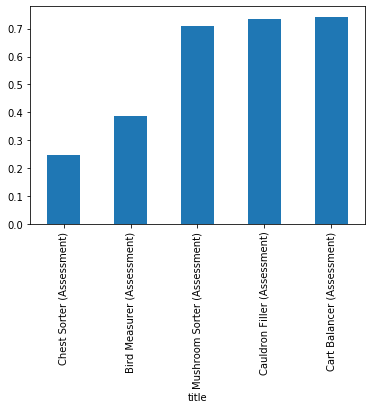

In [19]:
#  avg. accuracy per game
labels.groupby('title').mean().loc[:, 'accuracy'].sort_values().plot(kind='bar')

## Average accuracy per game

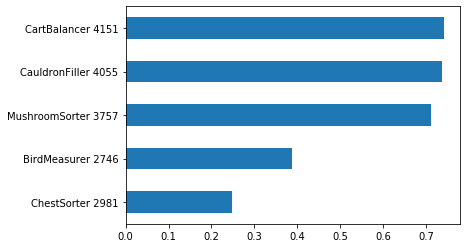

In [20]:
num_played = labels.groupby('title').count().loc[:, 'game_session']
new_cols = []
for name, value in zip(num_played.index, num_played.values):
    new_name = ''.join(name.split(' ')[:2] +  [' ' + str(value)])
    new_cols.append(new_name)
    
num_played.index = new_cols

grp = labels.groupby('title').mean()

grp.index = new_cols

grp.loc[:, 'accuracy'].sort_values().plot(kind='barh')

## matplotlib API

In [ ]:
import matplotlib.pyplot as plt

#  classic API
plt.plot(np.array([0, 1, 2]))

#  with pandas
df = pd.DataFrame(np.array([0, 1, 2]))
df.plot(kind='hist')

#  fig, ax
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 5))
axes[0, 0].hist(np.array([0, 1, 2]))
df.plot(ax=axes[1, 1], kind='hist')
fig.savefig('fig.png')

## Are some users better than others?

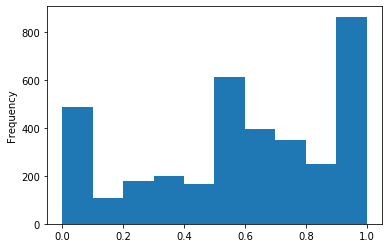

In [21]:
labels.groupby('installation_id').mean().loc[:, 'accuracy'].plot(kind='hist')

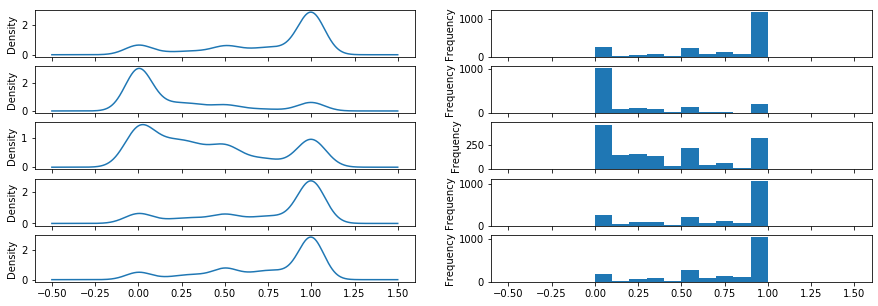

In [54]:
games = set(labels.loc[:, 'title'])
f, axes = plt.subplots(nrows=len(games), ncols=2, figsize=(15, 5), sharex=True)

for row_idx, game in enumerate(games):
    subset_mask = labels.loc[:, 'title'] == game
    subset = labels.loc[subset_mask, :]
    
    ax = axes[row_idx, :]
    
    subset.groupby('installation_id').mean().loc[:, 'accuracy'].plot(kind='kde', ax=ax[0])
    subset.groupby('installation_id').mean().loc[:, 'accuracy'].plot(kind='hist', ax=ax[1])

In [56]:
labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group,correct_ratio,correct_diff
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3,1.0,0
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0,0.0,-11
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3,1.0,0
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2,0.5,-1
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3,1.0,0


## Baseline predictions

For a given user, predict their accuracy_label

In [63]:
from random import choice

user = choice(labels.loc[:, 'installation_id'])

user

'7b9e1808'

For a given game, predict the accuracy_label

In [62]:
game = choice(labels.loc[:, 'title'])

game

'Chest Sorter (Assessment)'

## After lunch

Difference between groupby & resample for time series data

In [ ]:
labels.groupby(['title', 'accuracy_group']).describe()

In [ ]:
labels.groupby('title').sum()

In [ ]:
labels.loc[:, 'accuracy_group'].value_counts()